In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?'
id1 = '1p20Jy8eEKicwnoF-0C-5jW4MXGdwx9g1'  # MANIPULATED DATA

downloaded = drive.CreateFile({'id':id1}) 
downloaded.GetContentFile('TRAIN_SET_MANIPULATED.csv')  

df_train = pd.read_csv('TRAIN_SET_MANIPULATED.csv')
# Dataset is now stored in a Pandas Dataframe

link = 'https://drive.google.com/open?'
id2 = '1liD3KmaYAC0eUEQPVvWYtVJ6ESK_wngI'  # VALIDATION DATA
downloaded = drive.CreateFile({'id':id2}) 
downloaded.GetContentFile('VAL_SET.csv')  


df_val = pd.read_csv('VAL_SET.csv')
# Dataset is now stored in a Pandas Dataframe

ink = 'https://drive.google.com/open?'
id3 = '1ujZKJ_-46z8gYFk4yS2tnNqBXdCeOJlZ' #TEST DATA

downloaded = drive.CreateFile({'id':id3}) 
downloaded.GetContentFile('TEST_SET.csv')  

df_test = pd.read_csv('TEST_SET.csv')
# Dataset is now stored in a Pandas Dataframe

#Create the array with predefined values. Scale the train, test and validation set.  Put train and validation in the same array.

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()

X_train = df_train[['ws10', 'Wx10', 'Wy10','te100','Navhub_height','Max_Power']]
Y_train = df_train[['power']]

X_test = df_test[['ws10', 'Wx10', 'Wy10','te100','Navhub_height','Max_Power']]
Y_test = df_test[['power','month']]

X_val = df_val[['ws10', 'Wx10', 'Wy10','te100','Navhub_height','Max_Power']]
Y_val = df_val[['power']]

#Do all the X SCALING
X_train = X_scaler.fit_transform(X_train)
X_val = X_scaler.transform(X_val) #ONLY transform
X_test = X_scaler.transform(X_test) #ONLY transform


#Do the gridsearch Talos

In [ ]:
!pip install talos

     |████████████████████████████████| 61kB 2.5MB/s 
     |████████████████████████████████| 9.5MB 5.0MB/s 
     |████████████████████████████████| 5.4MB 31.6MB/s 
     |████████████████████████████████| 2.6MB 32.9MB/s 
  Created wheel for chances: filename=chances-0.1.9-cp37-none-any.whl size=41610 sha256=2ff534dde05d14e90ad96be3460a31864bf5f6845da346ed248a60b704a3f109
  Stored in directory: /root/.cache/pip/wheels/75/33/46/c871b94249bd57d17797d049b3dff8e3a09c315afb67eb14c6
  Created wheel for wrangle: filename=wrangle-0.6.7-cp37-none-any.whl size=49894 sha256=99f61e06d68a35294995a4549183e1bbe5a562f48c9f82c2863d3a34c3980d41
  Stored in directory: /root/.cache/pip/wheels/bf/1b/50/d0403ce6ef269e364894da7b50db68db14c4ac62c577561e2d
  Created wheel for kerasplotlib: filename=kerasplotlib-0.1.6-cp37-none-any.whl size=3603 sha256=3e443be5bab498c646d001b3214024ef3984a84ead09b224122c54f50ecde2d2
  Stored in directory: /root/.cache/pip/wheels/9d/d3/8c/9503a22b0a38e8b21c70ad834e4606d209193443e

In [ ]:
from tensorflow import keras
from keras.activations import relu
from keras.losses import mean_squared_error,mean_absolute_error
#Define the search space

p = {'learning_rate': [0.01,0.001],
     'losses': ['mse'],
     'neurons_in_hidden': [32,64,128],
     'batch_size': [32,128,256,4686],
     'epochs': [50,100,1000]}

In [ ]:
import talos as t
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from talos.model.early_stopper import early_stopper
from keras.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,InputLayer

#Design the MLP architecture

def reset_seeds():
    tf.random.set_seed(1234)

#reset seeds
reset_seeds()

def MLP_model(X_train,Y_train,X_val,Y_val,params):
  model = Sequential()
  model.add(InputLayer(6))
  model.add(Dense(params['neurons_in_hidden'],activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1))

  model.compile(optimizer = Adam(learning_rate = params['learning_rate']),
                loss = params['losses'],
                metrics = [tf.keras.metrics.mean_squared_error,tf.keras.metrics.mean_absolute_error,tf.keras.metrics.RootMeanSquaredError()])
  
  #mode = ' moderate' means that patience is int(epochs/10)
  history = model.fit(X_train,
                      Y_train,
                      batch_size=params['batch_size'],
                      verbose =1,
                      validation_data = (X_val,Y_val),
                      callbacks= [early_stopper(epochs = params['epochs'],
                                                monitor = 'val_loss', 
                                                mode = 'strict')])
  return history, model

In [ ]:
from talos import Scan
import talos as t

reset_seeds()

#Do the hyperparameter search, NOTE: the order of these parameters needs to be kept the same otherwise TypeError
#%time hyperparameter_scan = t.Scan(X_train,Y_train,params = p,model = MLP_model,experiment_name= 'Talos_manipulated',x_val = X_val,y_val=Y_val,seed = 1234,reduction_metric = 'val_loss', minimize_loss=True,print_params= True)

In [ ]:
#Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?'
id1 = '1yxUilJbAuCHQJXftQH19tz8xeMy1CaoA'  # TALOS MANIPULATED GRID RESULTS
downloaded = drive.CreateFile({'id':id1}) 
downloaded.GetContentFile('Talos_manipulated.csv')  

df_params = pd.read_csv('Talos_manipulated.csv')
# Dataset is now stored in a Pandas Dataframe


In [ ]:
print(df_params['mean_squared_error'].min())

11122.869140625


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

result = df_params[df_params['mean_squared_error']== 11122.869140625] #Select the row with the lowest mse
print(result[['neurons_in_hidden','batch_size','epochs','learning_rate','root_mean_squared_error']])

   neurons_in_hidden  batch_size  epochs  learning_rate  \
2                128          32      50           0.01   

   root_mean_squared_error  
2               105.465012  


## Method for predictions vs actual values plot

In [ ]:

def eval_plot(Y_pred, Y_test, title): 
  #Y_pred = predictions
  Y_test.reset_index(inplace= True, drop = True) # We need to reset index to align test data with predicted values
  end = Y_test.index[-1] #Get the last index of the df
  print(end)
  start = 0
  first = int(end/5)
  second = 2*first
  third = 3*first
  fourth = 4*first
  locations = [start,first,second,third,fourth,end]
  times = []
  for i in locations:
    times.append(Y_test['month'][i])

  plt.figure(figsize=(70,30))
  plt.title(title, fontsize = 50)
  plt.xticks(locations ,times, fontsize = 30)
  plt.yticks(fontsize = 30)
  plt.plot(Y_test.index,Y_test['power'],label= "Truth",color = 'orange')
  plt.plot(Y_test.index,Y_pred, label = "Predictions",color='blue')
  plt.legend(loc="upper left", fontsize = 50)
  plt.xlabel("Timestamp", fontsize = 30)
  plt.ylabel("kW", fontsize = 30)
  plt.show()

In [ ]:
print(Y_test.head())

   power  month
0   31.3      2
1   35.2      2
2   15.1      2
3    4.9      2
4    7.1      2


#Final Predict on test data

Epoch 1/50
1517/1517 [==============================] - 4s 3ms/step - loss: 13828.4423 - val_loss: 17967.7754
Epoch 2/50
1517/1517 [==============================] - 3s 2ms/step - loss: 7739.9965 - val_loss: 14903.6973
Epoch 3/50
1517/1517 [==============================] - 2s 2ms/step - loss: 5145.3446 - val_loss: 14691.9814
Epoch 4/50
1517/1517 [==============================] - 3s 2ms/step - loss: 4592.8839 - val_loss: 14749.8926
Epoch 5/50
1517/1517 [==============================] - 2s 2ms/step - loss: 4513.0981 - val_loss: 14604.0410
Epoch 6/50
1517/1517 [==============================] - 2s 2ms/step - loss: 4483.6048 - val_loss: 14430.4307
Epoch 7/50
1517/1517 [==============================] - 2s 2ms/step - loss: 4465.7726 - val_loss: 14277.7363
Epoch 8/50
1517/1517 [==============================] - 2s 1ms/step - loss: 4450.0850 - val_loss: 14147.5859
Epoch 9/50
1517/1517 [==============================] - 2s 2ms/step - loss: 4434.9133 - val_loss: 14022.9150
Epoch 10/50
1517/1

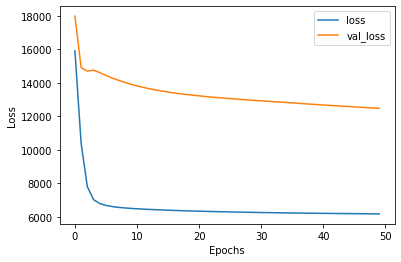

25668


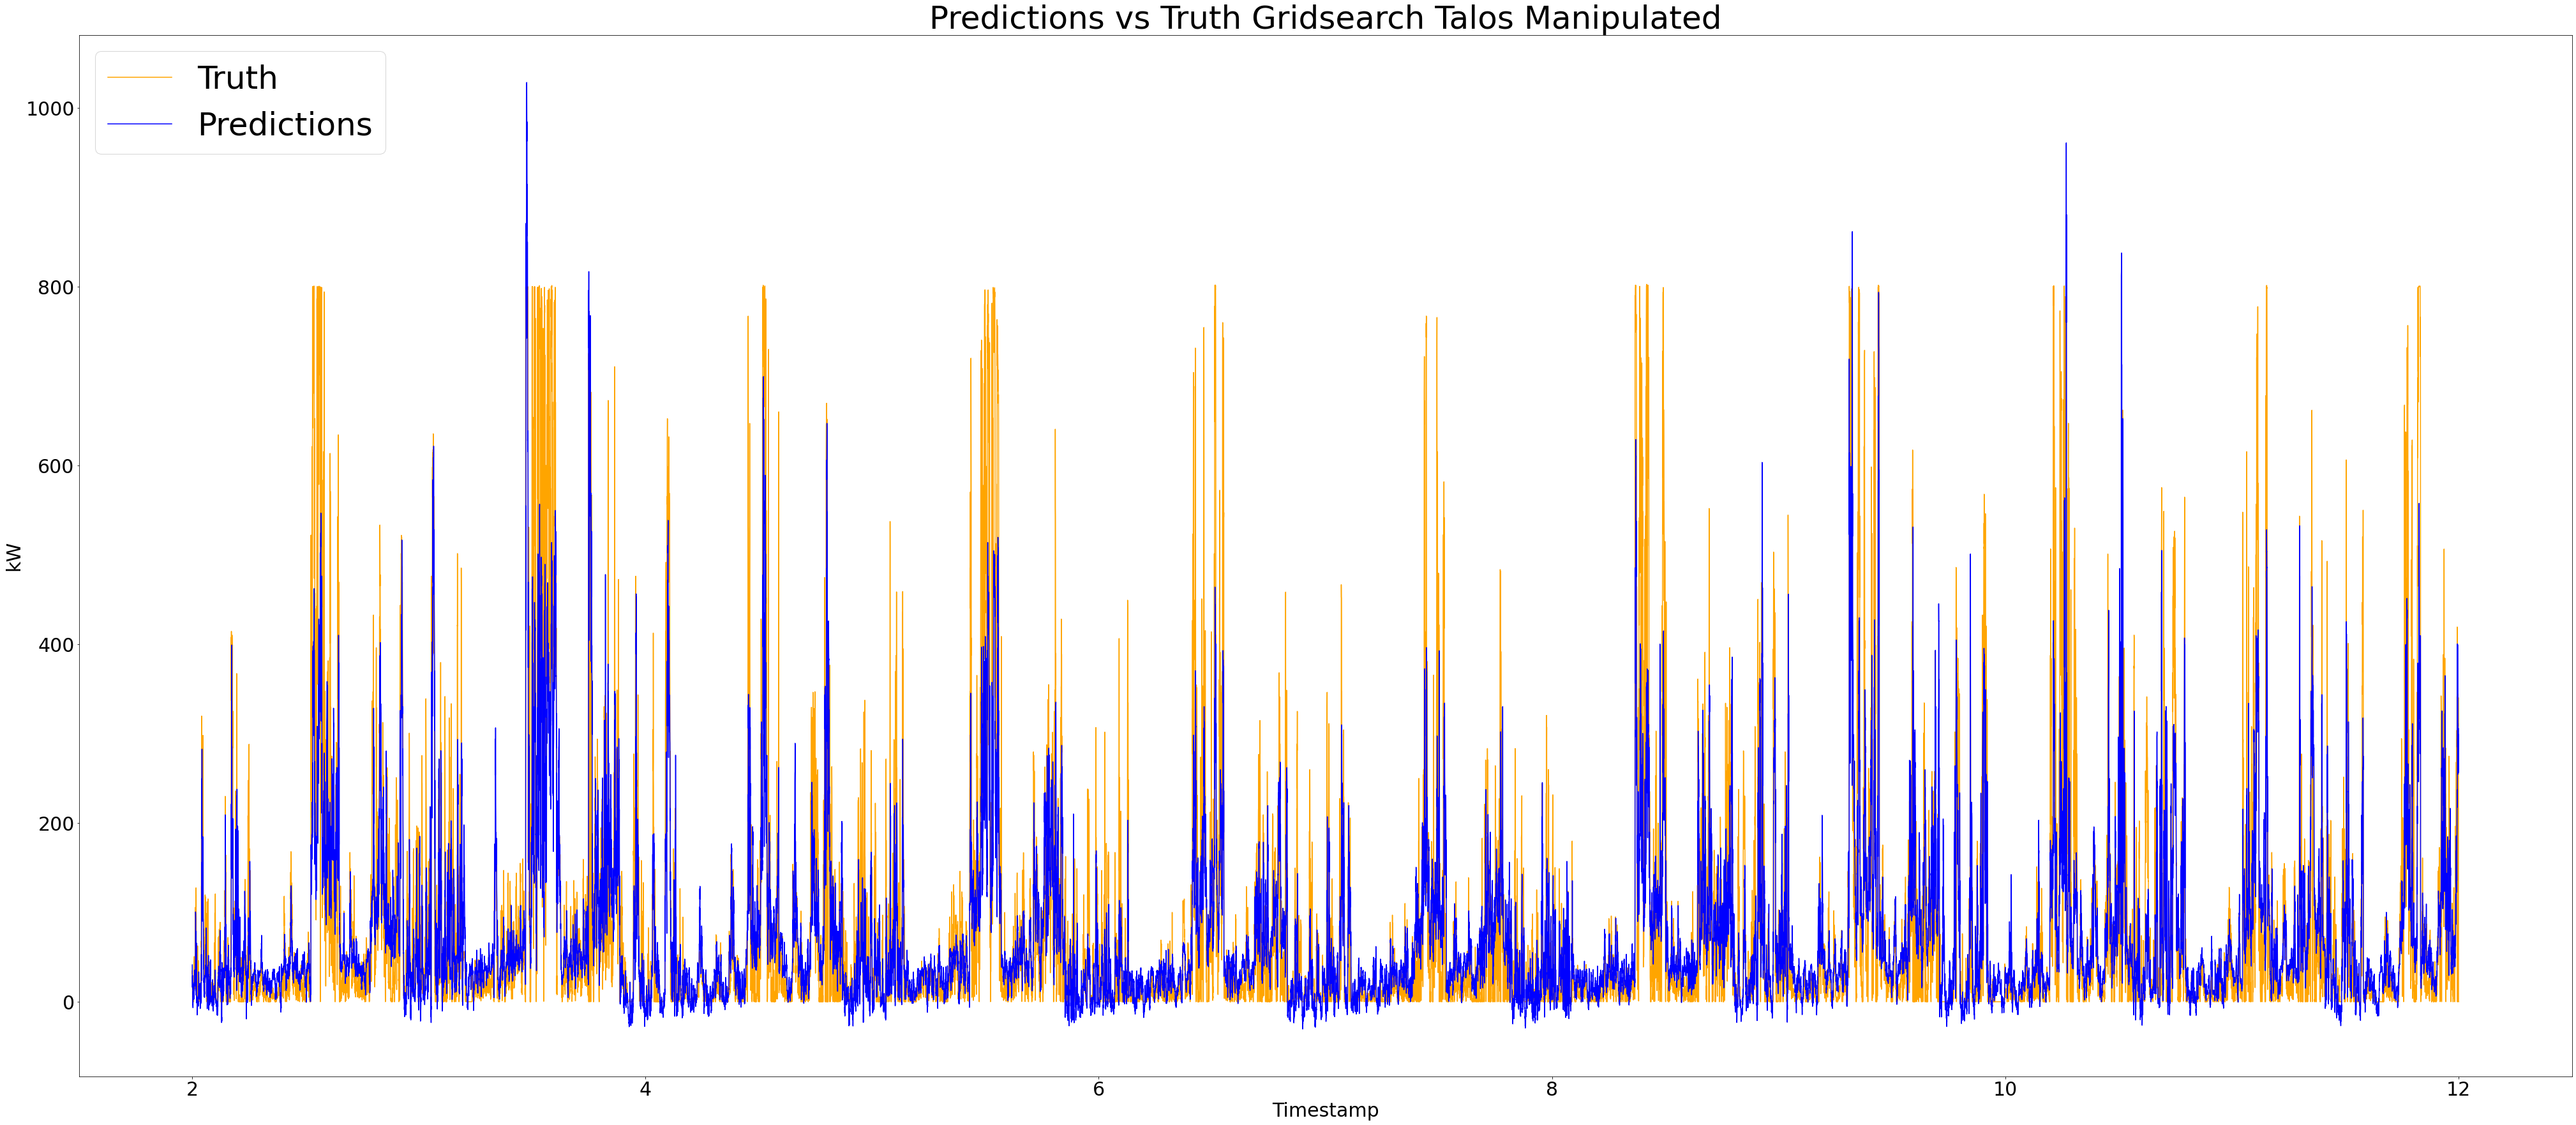

Root of mean squared error
98.35318709046066
MAE
53.34012957642597
CPU times: user 2min 20s, sys: 13.4 s, total: 2min 34s
Wall time: 2min 6s


In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def reset_seeds():
  tf.random.set_seed(1234)

#reset seeds 
reset_seeds()

def final_model():
  #design architecture
  model = Sequential()
  model.add(InputLayer(6)) 
  model.add(Dense(128,activation = 'relu'))
  model.add(Dense(1))
  opt = Adam(learning_rate=0.01)
  model.compile(optimizer=opt,loss='mse')

  #set up fitting
  stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2) 
  model.fit(x= X_train[:,0:6],y = Y_train,validation_data=(X_val[:,0:6],Y_val), batch_size=32,epochs = 50 ,callbacks=[stop], shuffle = False)

  #plot training error vs evaluation
  losses = pd.DataFrame(model.history.history)
  losses.plot()
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.show()

  predictions = model.predict(X_test[:,0:6])

  #plotting true vs predict
  eval_plot(predictions, Y_test,'Predictions vs Truth Gridsearch Talos Manipulated')

  #dropping 'month'column (used for plotting) to have Y_test with just power
  Y_test.drop('month', axis=1, inplace=True)

  #Square-root of mean squared error
  print('Root of mean squared error')
  print(np.sqrt(mean_squared_error(Y_test,predictions)))

  #How well we predicted on average using mae:
  print('MAE')
  print(mean_absolute_error(Y_test,predictions)) 
  


# Start final test
%time final_model()
